In [1]:
import numpy as np
import pandas as pd
import collections
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import math
import matplotlib.pyplot as plt
from scipy.special import zeta
from wordcloud import WordCloud
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Language Models (5 Points)

#### Helpful functions for preprocessing the data

In [2]:
def load_corpus(path):
    with open(file="wikitext-2/train.txt", mode="r", encoding="utf8") as f:
        corpus = f.read()
    return corpus

def preprocess_corpus(corpus):
    remove_escape_char = re.sub("\n", "", corpus)
    remove_html_char = re.sub(r"<.*?>", "", remove_escape_char)
    remove_special_char = re.sub(r"[^\w\s]", "", remove_html_char)

    out = remove_special_char.lower()

    return out
    

In [3]:
with open(file="wikitext-2/train.txt", mode="r") as f:
    corpus = f.read()

In [4]:
corpus[:100]

' \n = Valkyria Chronicles III = \n \n Senjō no Valkyria 3 : <unk> Chronicles ( Japanese : 戦場のヴァルキュリア3 ,'

In [5]:
sents = nltk.sent_tokenize(preprocess_corpus(corpus))

In [6]:
preprocessed_corpus = preprocess_corpus(corpus)
tokens = nltk.tokenize.word_tokenize(preprocessed_corpus)
stopwords_english = set(stopwords.words("english"))
preprocessed_corpus_final = [w for w in tokens if w not in stopwords_english]

In [7]:
print(stopwords_english)

{'which', 'himself', "you're", "she's", 'her', 'why', 'a', 'wasn', 'those', 'just', "you've", 'can', 'had', 'they', "mightn't", 'you', 'he', 'after', 't', 'i', 'wouldn', 'shan', 'other', 'be', "doesn't", 'over', 'so', "haven't", "wouldn't", "shan't", 'more', 'having', 'some', 'whom', 'will', 'o', "it's", 'to', 'hasn', 'very', 'who', "isn't", 'further', 'about', 'any', 'ain', 'if', 'no', 'now', 'didn', "didn't", "mustn't", 'ourselves', 'for', "you'd", 'its', 'them', 'while', "that'll", 'these', 'few', 'same', 'itself', 'won', 've', 'y', 'yourselves', 'has', 'him', 'each', 'have', 'was', 'above', "hadn't", 'your', 'did', 'on', 'is', 'both', "shouldn't", 'from', 'does', 'do', 'our', "don't", 'not', "couldn't", 'how', 'into', 'too', 'by', 'am', 'up', 'll', 'of', 'it', 'theirs', 'when', 'should', "wasn't", 'and', 'until', "weren't", 'off', "aren't", 'most', 'under', 'only', 'been', 'an', 'what', 'yourself', 'myself', 'his', "won't", 'then', 'doesn', 'ours', 'at', 'doing', 'all', 'but', 'her

In [8]:
tokens[:20]

['valkyria',
 'chronicles',
 'iii',
 'senjō',
 'no',
 'valkyria',
 '3',
 'chronicles',
 'japanese',
 '戦場のヴァルキュリア3',
 'lit',
 'valkyria',
 'of',
 'the',
 'battlefield',
 '3',
 'commonly',
 'referred',
 'to',
 'as']

In [9]:
preprocessed_corpus_final[:20]

['valkyria',
 'chronicles',
 'iii',
 'senjō',
 'valkyria',
 '3',
 'chronicles',
 'japanese',
 '戦場のヴァルキュリア3',
 'lit',
 'valkyria',
 'battlefield',
 '3',
 'commonly',
 'referred',
 'valkyria',
 'chronicles',
 'iii',
 'outside',
 'japan']

In [10]:
type(preprocessed_corpus_final)

list

In [11]:
def count_words(lst_tokens: list) -> tuple[list, list]: 
    dict_tokens = nltk.defaultdict(int)
    for token in lst_tokens:
        dict_tokens[token] += 1
    
    sorted_counts = sorted(dict_tokens.items(), key=lambda x: x[1], reverse=True) 
    return dict_tokens, sorted_counts

In [12]:
counts_sorted = count_words(preprocessed_corpus_final)[1]

In [13]:
def get_top_n(lst_tuples: list, n=None) -> list:
    out = []
    print(f"Most {n} frequent words")
    if n is None:
        return lst_tuples
    else:
        for i in range(n):
            out.append(lst_tuples[i])
            print(f"{lst_tuples[i][0]} --> {lst_tuples[i][1]}")
    return out

In [14]:
counts_sorted[:10]

[('first', 4245),
 ('one', 3910),
 ('also', 3842),
 ('two', 3565),
 ('new', 2767),
 ('time', 2607),
 ('would', 2332),
 ('1', 2248),
 ('game', 2077),
 ('2', 1979)]

In [15]:
get_top_n(counts_sorted, n=3)

Most 3 frequent words
first --> 4245
one --> 3910
also --> 3842


[('first', 4245), ('one', 3910), ('also', 3842)]

In [51]:
c = [v for (k,v) in counts_sorted]
keys = [k for (k,v) in counts_sorted]
r = [idx+1 for idx, elem in enumerate(keys)]
print(f"counts (top 10): {c[:10]}")
print(f"keys (top 10): {keys[:10]}")
print(f"rank (top 10): {r[:10]}")

def zipf_coefficient(r: list, c: list):
    log_r = [math.log(rank) for rank in r]
    log_c = [math.log(count) for count in c]

    # compute euclidean norm
    power2 = [rank**2 for rank in log_r]
    euclidean_norm = 0
    for elem in power2:
        euclidean_norm += elem
    #euclidean_norm = math.sqrt(sum_elements)

    multiply_r_c = [(elem * log_c[idx])/euclidean_norm for idx, elem in enumerate(log_r)]
    scalar_product = np.dot(np.array(log_c), np.array(log_r))
    #s_hat = [math.exp(elem) for elem in multiply_r_c]
    s_hat = math.exp(scalar_product/euclidean_norm)
    #print(f"scalar == {scalar_product}")
    #print(f"quotient == {scalar_product/euclidean_norm}")
    return s_hat, euclidean_norm


counts (top 10): [4245, 3910, 3842, 3565, 2767, 2607, 2332, 2248, 2077, 1979]
keys (top 10): ['first', 'one', 'also', 'two', 'new', 'time', 'would', '1', 'game', '2']
rank (top 10): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [28]:
s, norms = zipf_coefficient(r, c)
print(f"Estimated zipf coefficient s == {s}")

Estimated zipf coefficient s == 1.2760031104213203


In [34]:
for i in range(10):
    rr = r[i]
    cc = c[i]
    k = cc / (rr**(-s))
    print(k)


4245.0
9468.735130872701
15608.658023943775
20906.91510709575
21572.33017548473
25648.646208116068
27930.343298849315
31925.8110724498
34280.95457895551
37363.61639624287


In [37]:
rr0 = r[2]
cc0 = c[2]
k = cc0 / (rr0**(-s))
k

15608.658023943775

In [41]:
estim = [k*(rank**(-s)) for rank in r]

In [42]:
estim[:10]

[15608.658023943775,
 6445.407124615096,
 3842.0,
 2661.553154557644,
 2002.0626608679265,
 1586.5075738595988,
 1303.220304969774,
 1099.056282648519,
 945.6907811905797,
 826.7276352963215]

In [49]:
def plot_loglog(ranks, observed, expected):
    #plt.loglog(ranks, observed,  'r-', label='Observed')
    plt.loglog(ranks, expected, 'b-', label='Expected')
    plt.legend()
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law')
    plt.show()

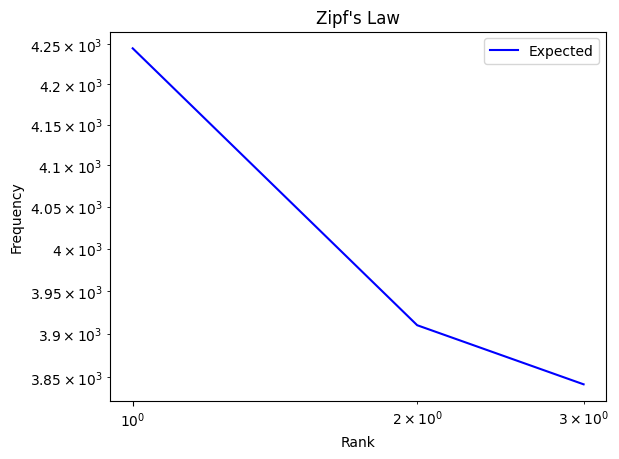

In [50]:
plot_loglog(ranks=r[:3], observed=estim[:3], expected=c[:3])